In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
insead_df = pd.read_excel("/content/drive/MyDrive/MBAX 6330/whosn1-excel-raw-data.xlsx",'Data', index_col=None, na_values=['NA'])

In [ ]:
insead_df.head()

,ResponseID,Funnel,Citizen,PrefSchool,Q1a,Q1b,Q2a,Q2b,Q2c,Q3,...,Q25A,Q25B,Q26a,Q26b,FunnelPerformance,CONSIDERATION,FAVORITE,Female,Age,Work_exp
0,R_00OqOJnWgjUZ9c1,1,14,Wharton,1,600.0,1,1,2.0,Havard Unversity Business School MBA program,...,NaN,NaN,NaN,NaN,5,1,1,1,30,1.0
1,R_00OqOJnWgjUZ9c1,1,14,Wharton,1,600.0,1,1,2.0,Havard Unversity Business School MBA program,...,NaN,NaN,NaN,NaN,3,1,0,1,30,1.0
2,R_018WlWuA3t54RJX,1,14,Harvard Business School,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,5,1,1,0,35,4.0
3,R_018WlWuA3t54RJX,1,14,Harvard Business School,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,4,1,1,0,35,4.0
4,R_01TWdrQC4YNj9lj,2,14,Stanford GSB,1,750.0,1,2,2.0,Stanford GSB,...,NaN,NaN,NaN,2.0,2,1,0,1,33,3.0


In [ ]:
insead_df.isnull().sum()

ResponseID        0
Funnel            0
Citizen           0
PrefSchool        6
Q1a               0
                 ..
CONSIDERATION     0
FAVORITE          0
Female            0
Age               0
Work_exp         26
Length: 114, dtype: int64

In [ ]:
# data types for columns 
insead_df.SchoolRated.dtypes

dtype('int64')

In [ ]:
# creating unity among the inputs 
insead_df['PrefSchool'] = insead_df['PrefSchool'].replace(['harvard','Harvard','harvard business school','Harvard Business School','Harvard School of Business','Havard Business School'],'Harvard')
insead_df['PrefSchool'] = insead_df['PrefSchool'].replace(['Insead','INSEAD'],'INSEAD')
insead_df['PrefSchool'] = insead_df['PrefSchool'].replace(['London Business School','London School Of Business'],'LSB')
insead_df['PrefSchool'] = insead_df['PrefSchool'].replace(['Wharton','Wharton Business School'],'Wharton')
insead_df['PrefSchool'] = insead_df['PrefSchool'].replace(['standford u','stanford','Stanford','Stanford Graduate School of Business','Stanford GBS'],'Stanford')

In [ ]:
# describes all columns 
insead_df.describe(include = 'all')

In [ ]:
insead_df.Age.describe()

count    919.000000
mean      35.112078
std        4.822950
min       19.000000
25%       32.000000
50%       35.000000
75%       38.000000
max       51.000000
Name: Age, dtype: float64

In [ ]:
insead_df.Work_exp.describe()

count    893.000000
mean       3.811870
std        1.825453
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Work_exp, dtype: float64

In [ ]:
pref = insead_df.PrefSchool.unique()
pref

array(['Wharton', 'Harvard', 'Stanford GSB', 'CUHK Business School',
       'Kellogg', 'Hong Kong UST Business School China',
       'Chinese University of HK', 'Columbia Business School', 'IESE',
       'Stanford', 'MIT – Sloan School of Management', 'EBS', 'NYU',
       'Esslingen Hochschule, BW, Germany',
       'NYU – Stern School of Business', 'CEIBS',
       'Hong Kong University of Science and Technology',
       'Cal state East Bay', 'George Mason', 'LSB', 'MIT',
       'Simon Business School', 'ESADE',
       'University of California, Berkeley – Haas School of Business',
       'Chicago – Booth School of Business', 'University of Otago',
       'HKUST', 'Oxford', nan, 'Orfalea College of Business',
       'university of toronto', 'HEC', 'MIP',
       'Dartmouth – Tuck School of Business',
       'Manchester Business School', 'McCombs', 'Duke',
       'Ohio state university', 'National University of Singapore',
       'Tuck', 'Goodman School of Business, Brock University', 'NU

In [ ]:
groups = insead_df.groupby(['SchoolRated']).Q17_30.mean()
groups

SchoolRated
1    4.222222
2    3.605263
3    3.270000
4    3.674912
5    3.666667
6    3.679487
7    4.225352
8    4.037037
Name: Q17_30, dtype: float64

In [ ]:
# how many people prefer INSEAD 
prefinsead = insead_df.PrefSchool.value_counts()
prefinsead

Harvard                                               122
INSEAD                                                 68
Wharton                                                66
Stanford                                               50
LSB                                                    44
                                                     ... 
Columbia and Wharton                                    2
Cornell University                                      2
Robert H. Smith School, the University of Maryland      2
Indian Institute of Management, Bengaluru               2
Smeal                                                   1
Name: PrefSchool, Length: 162, dtype: int64

In [ ]:
funnelcounts = insead_df.Funnel.value_counts()

funnelcounts

1    493
2    286
3    118
4     22
Name: Funnel, dtype: int64

In [ ]:



insead_df.loc[(insead_df['PrefSchool'].isin(['Harvard', 'INSEAD','Wharton']))].describe()

,Funnel,Citizen,Q1a,Q1b,Q2a,Q2b,Q2c,Q5_1,Q5_2,Q5_3,...,Q25A,Q25B,Q26a,Q26b,FunnelPerformance,CONSIDERATION,FAVORITE,Female,Age,Work_exp
count,256.000000,256.000000,256.000000,216.000000,256.0,256.000000,252.000000,256.000000,256.000000,256.000000,...,96.000000,14.000000,150.000000,38.000000,256.000000,256.000000,256.000000,256.000000,256.000000,254.000000
mean,1.320312,23.750000,1.156250,628.694444,1.0,1.320312,3.293651,3.750000,2.796875,3.414062,...,2.958333,2.000000,2.373333,1.736842,3.394531,0.992188,0.507812,0.335938,35.039062,3.779528
std,0.499939,7.821539,0.363803,108.146194,0.0,0.499939,1.740392,1.371989,1.065387,1.328584,...,0.679267,0.784465,1.058977,0.860051,1.118739,0.088215,0.500918,0.473242,4.499067,1.910708
min,1.000000,14.000000,1.000000,-1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,27.000000,1.000000
25%,1.000000,14.000000,1.000000,600.000000,1.0,1.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,1.250000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,31.000000,2.000000
50%,1.000000,30.000000,1.000000,650.000000,1.0,1.000000,3.000000,4.000000,3.000000,4.000000,...,3.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,34.000000,4.000000
75%,2.000000,30.000000,1.000000,700.000000,1.0,2.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,2.750000,3.000000,2.750000,4.000000,1.000000,1.000000,1.000000,39.000000,6.000000
max,3.000000,30.000000,2.000000,750.000000,1.0,3.000000,6.000000,5.000000,4.000000,5.000000,...,4.000000,3.000000,5.000000,3.000000,5.000000,1.000000,1.000000,1.000000,46.000000,7.000000


In [ ]:
# filtered out if preference was not HARVARD, INSEAD, or WHARTON 

Insead_filtered = insead_df.loc[(insead_df['PrefSchool'].isin(['Harvard', 'INSEAD','Wharton']))]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Insead_filtered.head()

,ResponseID,Funnel,Citizen,PrefSchool,Q1a,Q1b,Q2a,Q2b,Q2c,Q3,...,Q25A,Q25B,Q26a,Q26b,FunnelPerformance,CONSIDERATION,FAVORITE,Female,Age,Work_exp
0,R_00OqOJnWgjUZ9c1,1,14,Wharton,1,600.0,1,1,2.0,Havard Unversity Business School MBA program,...,NaN,NaN,NaN,NaN,5,1,1,1,30,1.0
1,R_00OqOJnWgjUZ9c1,1,14,Wharton,1,600.0,1,1,2.0,Havard Unversity Business School MBA program,...,NaN,NaN,NaN,NaN,3,1,0,1,30,1.0
2,R_018WlWuA3t54RJX,1,14,Harvard,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,5,1,1,0,35,4.0
3,R_018WlWuA3t54RJX,1,14,Harvard,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,4,1,1,0,35,4.0
26,R_0MPO0D1FVK9kJ6J,1,14,Harvard,2,NaN,1,1,4.0,Harvard University,...,NaN,NaN,NaN,NaN,5,1,1,0,33,4.0


In [ ]:
# filtered out if preference was not HARVARD, INSEAD, or WHARTON 

Insead_filtered1 = insead_df.loc[(insead_df['SchoolRated'].isin([1, 4, 8]))]

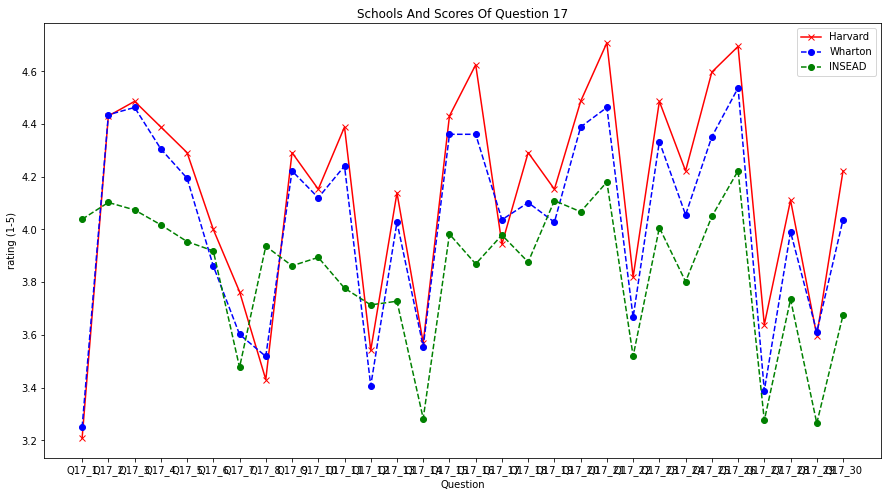

<Figure size 432x288 with 0 Axes>

In [ ]:

# set the figure 

plt.figure(figsize= (15,8))

# create a red solif line with x markers for the actual data set 
plt.plot(Harvard_means, 'r-x', label= 'Harvard')

# create blue dashed line with circle dots
plt.plot(means_Wharton, 'b--o' , label = 'Wharton')

plt.plot(insead_means, 'g--o' , label = 'INSEAD')

plt.title('Schools and Scores of Question 17'.title())
plt.xlabel("Question")
plt.ylabel("rating (1-5)")


#show labels for each dataset/series in the best corner

plt.legend()

plt.show()

plt.savefig('Graph1.png')

In [ ]:
Insead_filtered1.head()

,ResponseID,Funnel,Citizen,PrefSchool,Q1a,Q1b,Q2a,Q2b,Q2c,Q3,...,Q25A,Q25B,Q26a,Q26b,FunnelPerformance,CONSIDERATION,FAVORITE,Female,Age,Work_exp
0,R_00OqOJnWgjUZ9c1,1,14,Wharton,1,600.0,1,1,2.0,Havard Unversity Business School MBA program,...,NaN,NaN,NaN,NaN,5,1,1,1,30,1.0
2,R_018WlWuA3t54RJX,1,14,Harvard,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,5,1,1,0,35,4.0
3,R_018WlWuA3t54RJX,1,14,Harvard,1,750.0,1,1,5.0,HBS,...,NaN,NaN,2.0,NaN,4,1,1,0,35,4.0
5,R_01TWdrQC4YNj9lj,2,14,Stanford GSB,1,750.0,1,2,2.0,Stanford GSB,...,NaN,NaN,NaN,2.0,2,1,0,1,33,3.0
7,R_02muyZJp0wCX8cR,2,14,CUHK Business School,1,600.0,1,2,2.0,The Wharton School of the University of Pennsy...,...,NaN,NaN,NaN,NaN,1,0,0,0,30,2.0


In [ ]:

Harvard_school = insead_df.loc[(insead_df['SchoolRated'].isin([1]))]
insead_school = insead_df.loc[(insead_df['SchoolRated'].isin([4]))]
Wharton_school = insead_df.loc[(insead_df['SchoolRated'].isin([8]))]

In [ ]:
import seaborn as sns


In [ ]:
Harvard_school.describe()

NameError: ignored

In [ ]:
Harvard_school.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Funnel             1.652778
Citizen           19.333333
Q1a                1.125000
Q1b              609.523810
Q2a                1.000000
                    ...    
CONSIDERATION      0.819444
FAVORITE           0.430556
Female             0.416667
Age               34.236111
Work_exp           3.385714
Length: 108, dtype: float64

In [ ]:
#take certain columns

#Columns_to_keep = ['ResponseID','FAVORITE','CONSIDERATION','FunnelPerformance','Q2b','PrefSchool','Q5_1','Q5_3','Q5_4','Q5_8','Q15_1','Q15_3','Q15_4','Q15_8','Q17_26','Q17_30','SchoolRated']

Harvard_school_new  = Harvard_school[['Q17_1','Q17_2', 'Q17_3', 'Q17_4','Q17_5', 'Q17_6','Q17_7', 'Q17_8', 'Q17_9', 'Q17_10','Q17_11','Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q17_16', 'Q17_17', 'Q17_18', 'Q17_19','Q17_20', 'Q17_21', 'Q17_22', 'Q17_23', 'Q17_24', 'Q17_25', 'Q17_26', 'Q17_27', 'Q17_28', 'Q17_29', 'Q17_30']]

In [ ]:
Harvard_means = Harvard_school_new.mean()

In [ ]:
insead_school_new = insead_school[['Q17_1','Q17_2', 'Q17_3', 'Q17_4','Q17_5', 'Q17_6','Q17_7', 'Q17_8', 'Q17_9', 'Q17_10','Q17_11','Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q17_16', 'Q17_17', 'Q17_18', 'Q17_19','Q17_20', 'Q17_21', 'Q17_22', 'Q17_23', 'Q17_24', 'Q17_25', 'Q17_26', 'Q17_27', 'Q17_28', 'Q17_29', 'Q17_30']]

In [ ]:
insead_means = insead_school_new.mean()

In [ ]:
Wharton_school_new = Wharton_school[['Q17_1','Q17_2', 'Q17_3', 'Q17_4','Q17_5', 'Q17_6','Q17_7', 'Q17_8', 'Q17_9', 'Q17_10','Q17_11','Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q17_16', 'Q17_17', 'Q17_18', 'Q17_19','Q17_20', 'Q17_21', 'Q17_22', 'Q17_23', 'Q17_24', 'Q17_25', 'Q17_26', 'Q17_27', 'Q17_28', 'Q17_29', 'Q17_30']]

In [ ]:
means_Wharton = Wharton_school_new.mean()

Perceptron Map 

In [ ]:
import seaborn as sns 

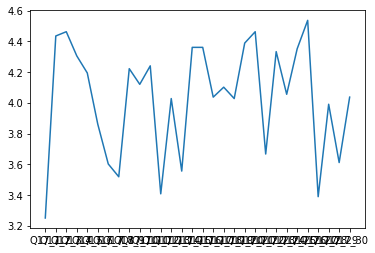

In [ ]:
plt.plot(means)

In [ ]:
# correlations 
corr = Harvard_school_new.corr()
corr

,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,...,Q17_21,Q17_22,Q17_23,Q17_24,Q17_25,Q17_26,Q17_27,Q17_28,Q17_29,Q17_30
Q17_1,1.000000,0.020685,-0.004361,0.093225,0.138974,0.168099,0.293725,0.529268,0.340047,0.198010,...,0.006183,0.354796,0.062962,0.211369,0.049819,-0.023218,0.221621,0.108108,0.314415,0.190516
Q17_2,0.020685,1.000000,0.716605,0.611431,0.627624,0.306395,0.287701,0.022819,0.558793,0.530736,...,0.644561,0.211309,0.640929,0.486888,0.749517,0.725043,0.243192,0.478173,0.171916,0.549638
Q17_3,-0.004361,0.716605,1.000000,0.616719,0.598755,0.241008,0.189993,0.091243,0.480246,0.420030,...,0.667694,0.118198,0.536513,0.424707,0.687578,0.594726,0.107657,0.371305,0.102939,0.431676
Q17_4,0.093225,0.611431,0.616719,1.000000,0.679693,0.385840,0.273472,0.154700,0.556627,0.449052,...,0.646072,0.293321,0.619441,0.501378,0.617125,0.597492,0.214492,0.436383,0.332388,0.365636
Q17_5,0.138974,0.627624,0.598755,0.679693,1.000000,0.368515,0.392534,0.192534,0.577175,0.430399,...,0.615952,0.381780,0.686731,0.392970,0.567734,0.514038,0.232004,0.391176,0.223471,0.458349
Q17_6,0.168099,0.306395,0.241008,0.385840,0.368515,1.000000,0.460835,0.259468,0.352442,0.325512,...,0.442997,0.374733,0.323334,0.305359,0.308023,0.176123,0.429304,0.348531,0.389239,0.049006
Q17_7,0.293725,0.287701,0.189993,0.273472,0.392534,0.460835,1.000000,0.345271,0.460895,0.426642,...,0.245829,0.492258,0.219597,0.515151,0.246437,0.138091,0.662209,0.415815,0.420825,0.267657
Q17_8,0.529268,0.022819,0.091243,0.154700,0.192534,0.259468,0.345271,1.000000,0.354654,0.377692,...,0.085546,0.363575,0.012805,0.136795,0.159882,0.007964,0.237189,0.314456,0.366335,0.164067
Q17_9,0.340047,0.558793,0.480246,0.556627,0.577175,0.352442,0.460895,0.354654,1.000000,0.702797,...,0.487190,0.324083,0.470848,0.431280,0.644185,0.466298,0.380584,0.474323,0.251028,0.532291
Q17_10,0.198010,0.530736,0.420030,0.449052,0.430399,0.325512,0.426642,0.377692,0.702797,1.000000,...,0.452198,0.259817,0.274971,0.262285,0.528659,0.453224,0.377718,0.464590,0.316959,0.504687


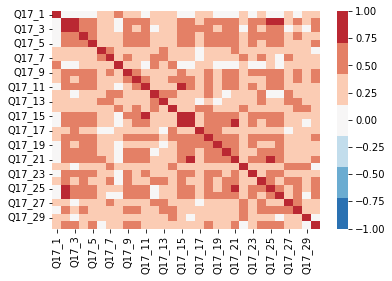

In [ ]:

corr = Harvard_school_new.corr()
#sns.light_palette("purple")
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 7), center = 0, vmin = -1, vmax = 1)